In [3]:
import re
import nltk
import os
import json
from datetime import datetime, date
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from collections import Counter, defaultdict

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/debbie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis

## Completed: Analyze Sentiment

### Don't need to run the cells in this section. All the data created by the cells in the section is loaded in in the first cell of the sentiments visualization section


In [58]:
keywords = ["asian", "china", "chinese", "corona", "coronavirus", "covid19", "cuomo", "fauci", "virus", "wuhan"]

In [59]:
baselineSentis = {}
months = []

dateFormat = '%Y-%m-%d' # ex. 2020-Apr-24
for file in os.listdir("baseline_cleaned/"):
    print(file)
    month = file[:-4][:3]
    months.append(month)
    with open(f"baseline_cleaned/{file}") as fp:
        text = fp.read()[5:]
    dateString = datetime.strptime(f"2019-{month}-15", '%Y-%b-%d').strftime(dateFormat)
    baselineSentis[dateString] = sia.polarity_scores(text)   
    

mar.txt
feb.txt
apr.txt
july.txt
nov.txt
jan.txt
june.txt
may.txt
aug.txt
oct.txt
sep.txt


In [60]:
weeklySentis = defaultdict(dict)

for folder in os.listdir("cleaned_data"):
    keyword = folder.split("_")[0]
    for file in os.listdir(f"cleaned_data/{folder}"):
        with open(f"cleaned_data/{folder}/{file}") as fp:
            text = fp.read()[5:]
        print(file)
        month, day = file.split("_")[1][:-4].split(".")
        if (month == "12"):
            year = 2019
        else:
            year = 2020

        date = f"{year}-{month}-{day}"
        pol = sia.polarity_scores(text)    
        weeklySentis[keyword][date] = pol

virus_04.05.txt
virus_04.12.txt
virus_03.22.txt
virus_01.26.txt
virus_01.19.txt
virus_03.08.txt
virus_12.29.txt
virus_02.02.txt
virus_02.16.txt
virus_02.09.txt
virus_02.23.txt
virus_04.19.txt
virus_01.12.txt
virus_01.05.txt
virus_03.29.txt
virus_03.01.txt
virus_03.15.txt
fauci_01.26.txt
fauci_03.22.txt
fauci_03.08.txt
fauci_01.19.txt
fauci_04.05.txt
fauci_04.12.txt
fauci_02.02.txt
fauci_02.16.txt
fauci_12.29.txt
fauci_02.09.txt
fauci_02.23.txt
fauci_01.12.txt
fauci_03.29.txt
fauci_03.01.txt
fauci_03.15.txt
fauci_01.05.txt
fauci_04.19.txt
chinese_12.29.txt
chinese_02.02.txt
chinese_02.16.txt
chinese_04.05.txt
chinese_04.12.txt
chinese_03.22.txt
chinese_01.26.txt
chinese_01.19.txt
chinese_03.08.txt
chinese_04.19.txt
chinese_01.12.txt
chinese_01.05.txt
chinese_03.01.txt
chinese_03.15.txt
chinese_03.29.txt
chinese_02.09.txt
chinese_02.23.txt
coronavirus_01.26.txt
coronavirus_03.22.txt
coronavirus_03.08.txt
coronavirus_01.19.txt
coronavirus_04.05.txt
coronavirus_04.12.txt
coronavirus_02.16.

In [61]:
# ************Only run if you need to resave the data***********
with open('jsons/weeklySentiments.json', 'w') as fp:
    json.dump(weeklySentis, fp)
    
with open('jsons/baselineSentiments.json', 'w') as fp:
    json.dump(baselineSentis, fp)

## Completed: Created basic visualizations for sentiments
## To Do: Polish visualizations

In [62]:
with open('jsons/weeklySentiments.json', 'r') as fp:
    weeklySentis = json.load(fp)
    
with open('jsons/baselineSentiments.json', 'r') as fp:
    baselineSentis = json.load(fp)

In [63]:
def byDate(tup):
    dateFormat = '%Y-%m-%d' # ex. 2020-04-24
    return datetime.strptime(tup[0], dateFormat)

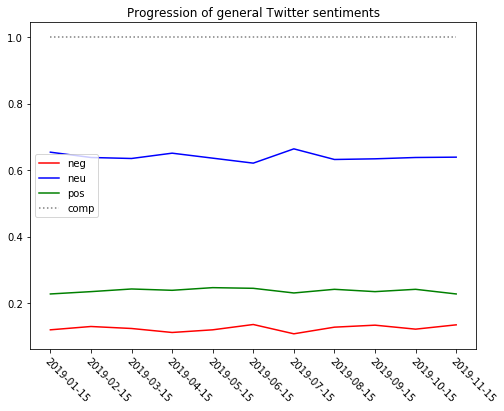

In [64]:
baseNeg = {}
baseNeu = {}
basePos = {}
points = []
# for date, senti in baselineSentis.items():
#     print(date, senti)
fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
for date, senti in baselineSentis.items():
    points.append((date, senti))
        
    points = sorted(points, key=byDate)
    x, sentis = zip(*points)

yNeg = [senti["neg"] for senti in sentis]
yNeu = [senti["neu"] for senti in sentis]
yPos = [senti["pos"] for senti in sentis]
yComp = [senti["compound"] for senti in sentis]

subs.plot(x, yNeg, color='red', label="neg")
subs.plot(x, yNeu, color='blue', label="neu")
subs.plot(x, yPos, color='green', label="pos")
subs.plot(x, yComp, color='gray', label="comp", linestyle='dotted')

subs.legend()
plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
subs.set_title(f"Progression of general Twitter sentiments")
#     plt.show()
plt.savefig(f"graphs/baseline_sentiments.jpg")

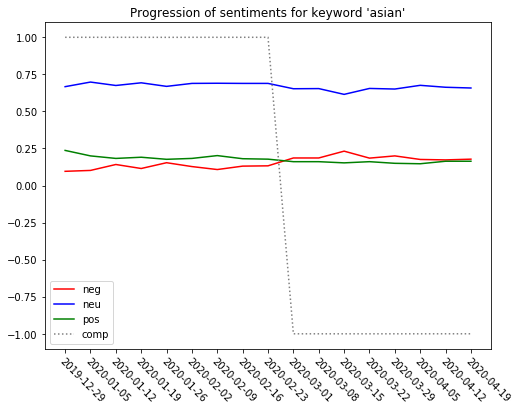

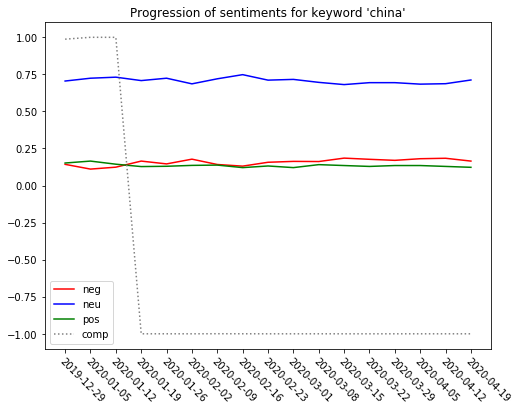

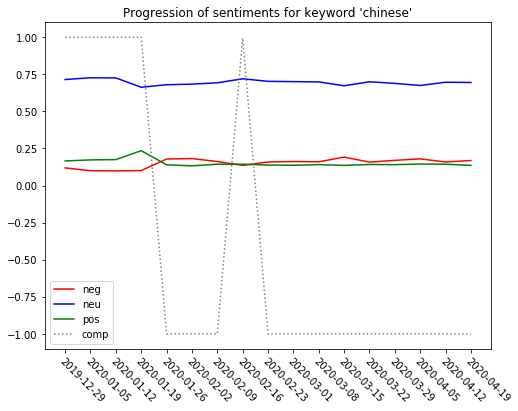

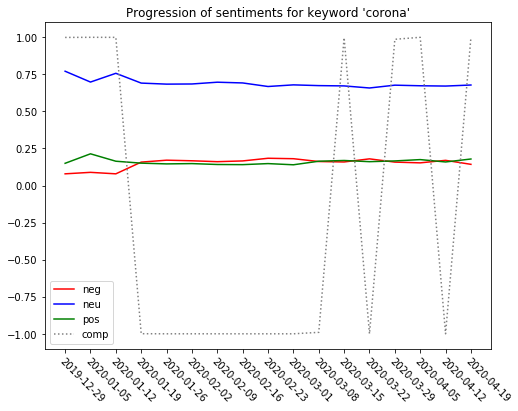

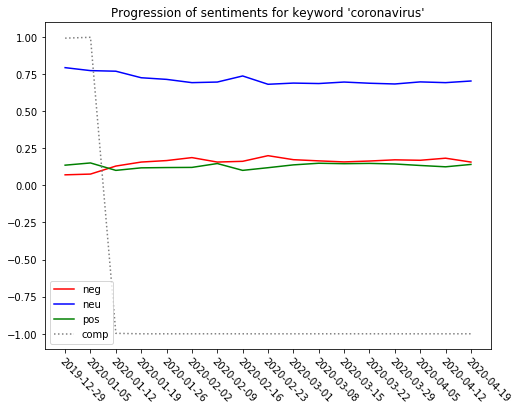

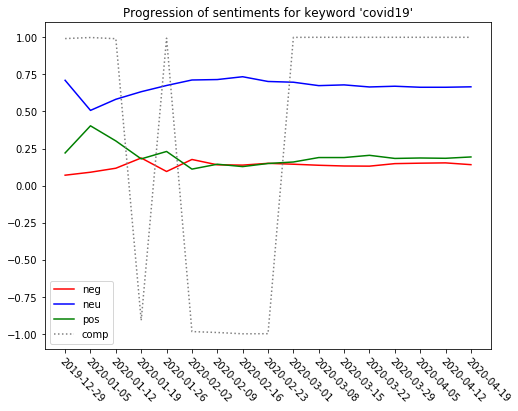

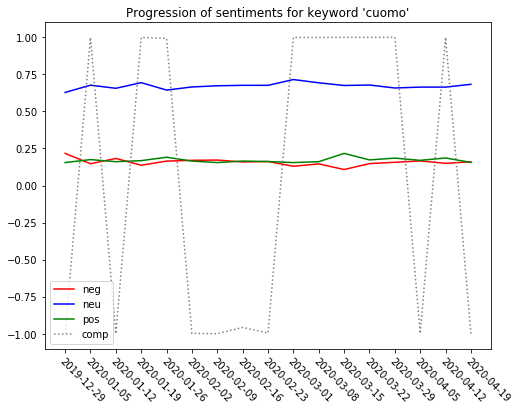

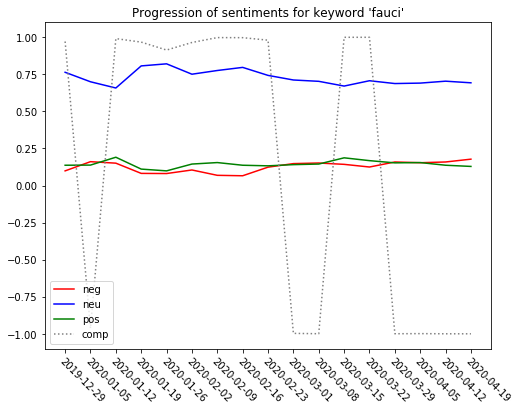

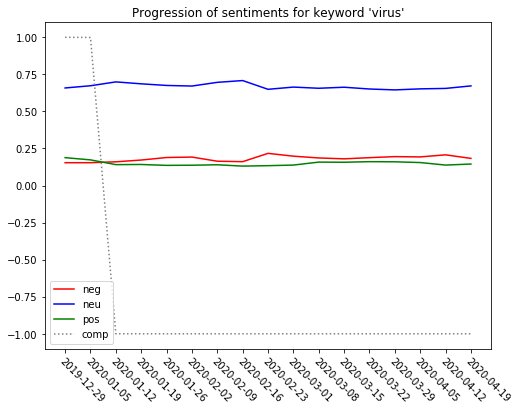

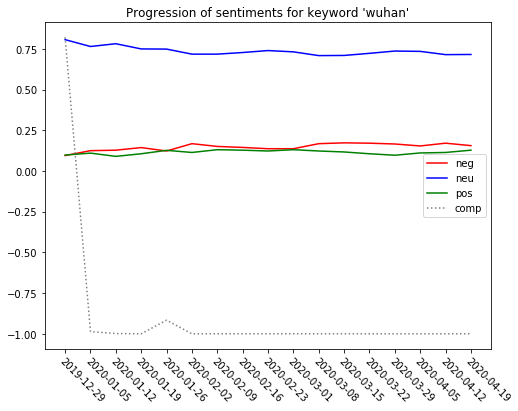

In [65]:
allNeg = {}
allNeu = {}
allPos = {}

for keyword in keywords:
    keySentis = weeklySentis[keyword]
    fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
    
    points = []
    for date, sentis in keySentis.items():
        points.append((date, sentis))
        
    points = sorted(points, key=byDate)
    x, sentis = zip(*points)
    
    yNeg = [senti["neg"] for senti in sentis]
    yNeu = [senti["neu"] for senti in sentis]
    yPos = [senti["pos"] for senti in sentis]
    yComp = [senti["compound"] for senti in sentis]
    
    allNeg[keyword] = yNeg
    allNeu[keyword] = yNeu
    allPos[keyword] = yPos
    
    subs.plot(x, yNeg, color='red', label="neg")
    subs.plot(x, yNeu, color='blue', label="neu")
    subs.plot(x, yPos, color='green', label="pos")
    subs.plot(x, yComp, color='gray', label="comp", linestyle='dotted')
    subs.legend()
    plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
    subs.set_title(f"Progression of sentiments for keyword '{keyword}'")
#     plt.show()
    plt.savefig(f"graphs/{keyword}_sentiments.jpg")

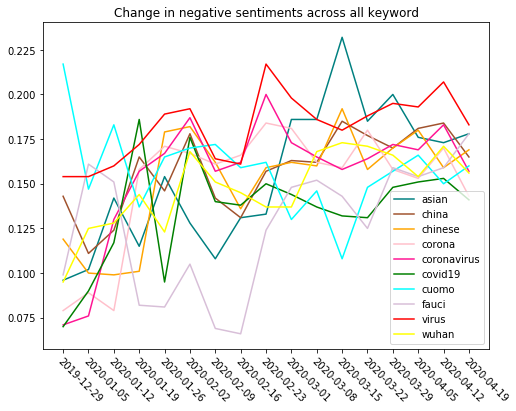

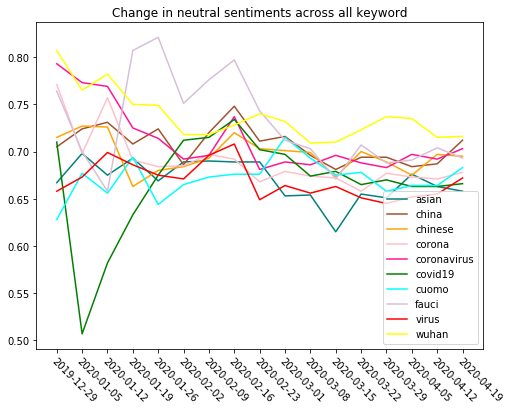

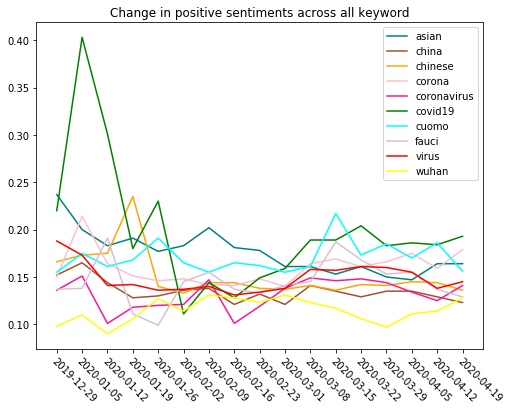

In [66]:
# set of line colors
colors = {"blue", "red", "green", "orange", "yellow", "pink", "aqua", "sienna", "thistle", "teal", "deeppink"}
fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
for keyword in keywords:
    yNeg = allNeg[keyword]
    subs.plot(x, yNeg, color=colors.pop(), label=keyword)
subs.legend(loc="lower right")
subs.set_title("Change in negative sentiments across all keyword")
plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.savefig("graphs/negative_sentiment.jpg")
    
# set of line colors
colors = {"blue", "red", "green", "orange", "yellow", "pink", "aqua", "sienna", "thistle", "teal", "deeppink"}
fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
for keyword in keywords:
    yNeu = allNeu[keyword]
    subs.plot(x, yNeu, color=colors.pop(), label=keyword)
subs.legend(loc="lower right")
subs.set_title("Change in neutral sentiments across all keyword")
plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.savefig("graphs/neutral_sentiment.jpg")
    
# set of line colors
colors = {"blue", "red", "green", "orange", "yellow", "pink", "aqua", "sienna", "thistle", "teal", "deeppink"}
fig, subs = plt.subplots(1, sharey = True, figsize=(8,6))
for keyword in keywords:
    yPos = allPos[keyword]
    subs.plot(x, yPos, color=colors.pop(), label=keyword)
subs.legend(loc="upper right")
subs.set_title("Change in positive sentiments across all keyword")
plt.setp(subs.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
plt.savefig("graphs/positive_sentiment.jpg")

# Word Frequency

## Completed: Count Words

In [99]:
# list of keywords
exclude = ["asian", "china", "chinese", "corona", "coronavirus", "covid19", "cuomo", "fauci", "virus", "wuhan"]

# Create counters that track the total word frequency across all tweets and also weekly 
# counters by keyword
keywords = []
weeklyCounters = defaultdict(dict)
totalCounter = Counter()
for folder in os.listdir("cleaned_data"):
    keyword = folder.split("_")[0]
    keywords.append(keyword)
    for file in os.listdir(f"cleaned_data/{folder}"):
        with open(f"cleaned_data/{folder}/{file}") as fp:
            splitText = fp.read()[5:].split()
            
        filtered = [w.lower() for w in splitText if not w.lower() in exclude] 
        weeklyCounter = Counter(filtered)
        
        month, day = file.split("_")[1][:-4].split(".")
        if (month == "12"):
            year = 2019
        else:
            year = 2020
        date = f"{year}-{month}-{day}"
        
        weeklyCounters[keyword][date] = weeklyCounter
        totalCounter.update(splitText)

In [102]:
# ************Only run if you need to resave the data***********
with open('jsons/weekly_counters.json', 'w') as fp:
    json.dump(weeklyCounters, fp)
    
with open('jsons/|total_counter.json', 'w') as fp:
    json.dump(totalCounter, fp)

## To Do: Create Visualizations for Word Frequency

In [103]:
with open('jsons/counters.json', 'r') as fp:
    weeklyCounters = json.load(fp)

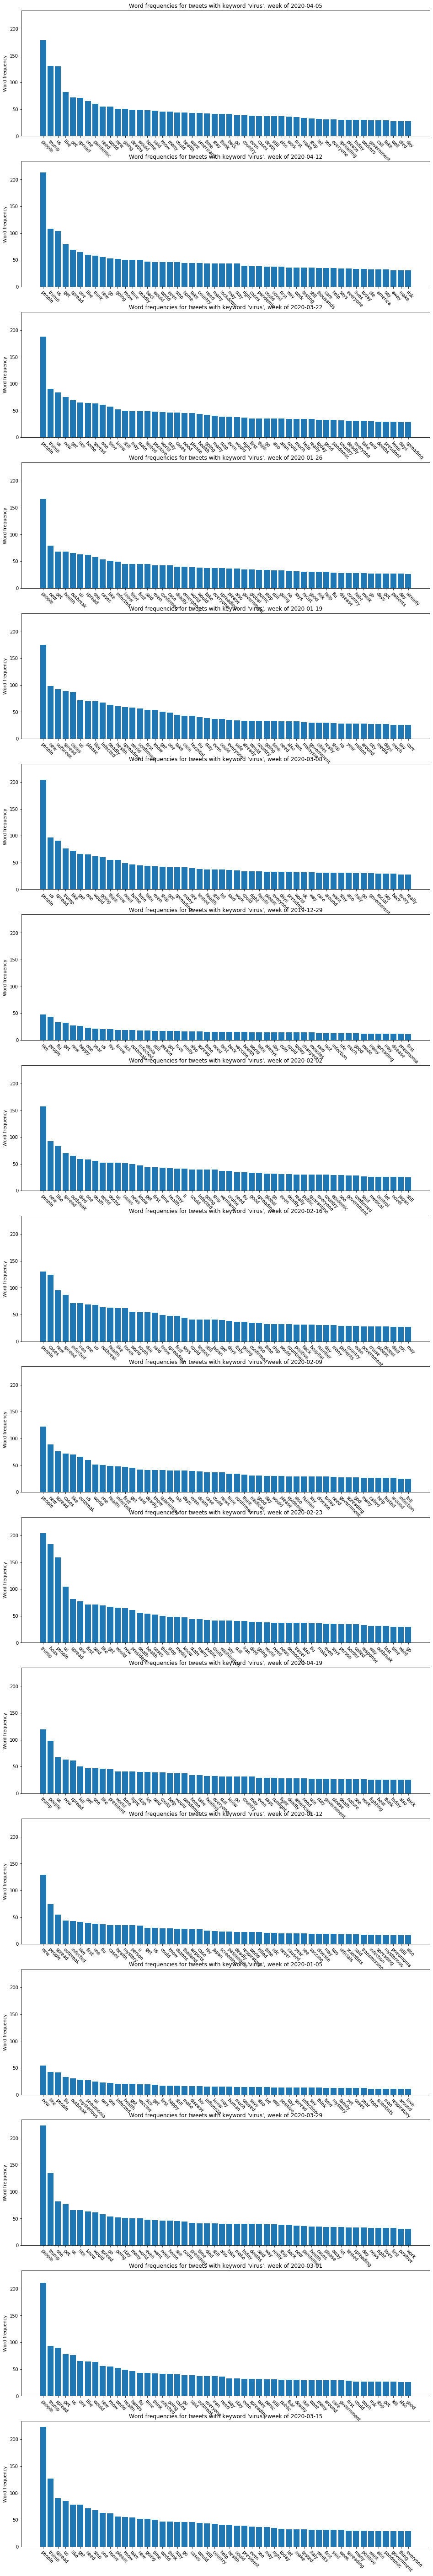

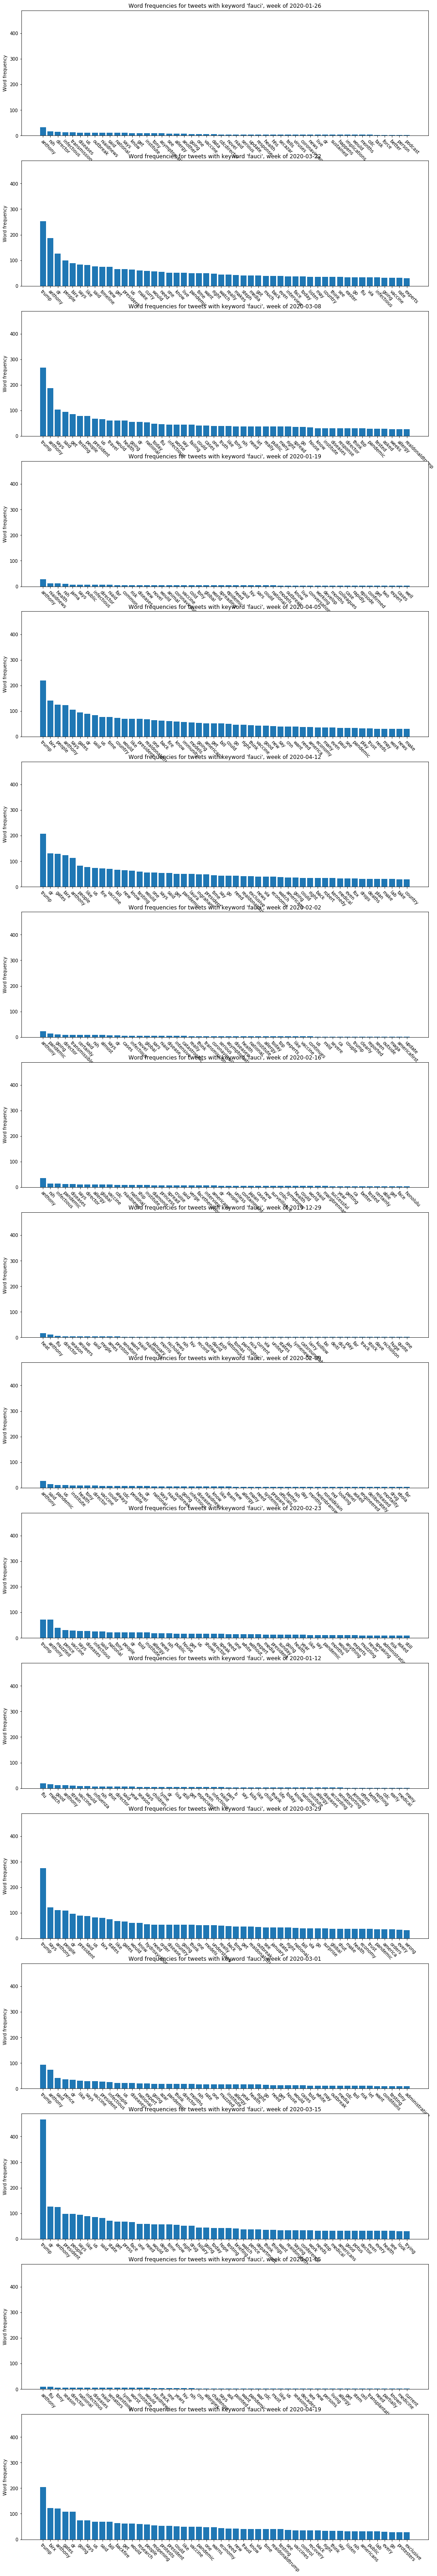

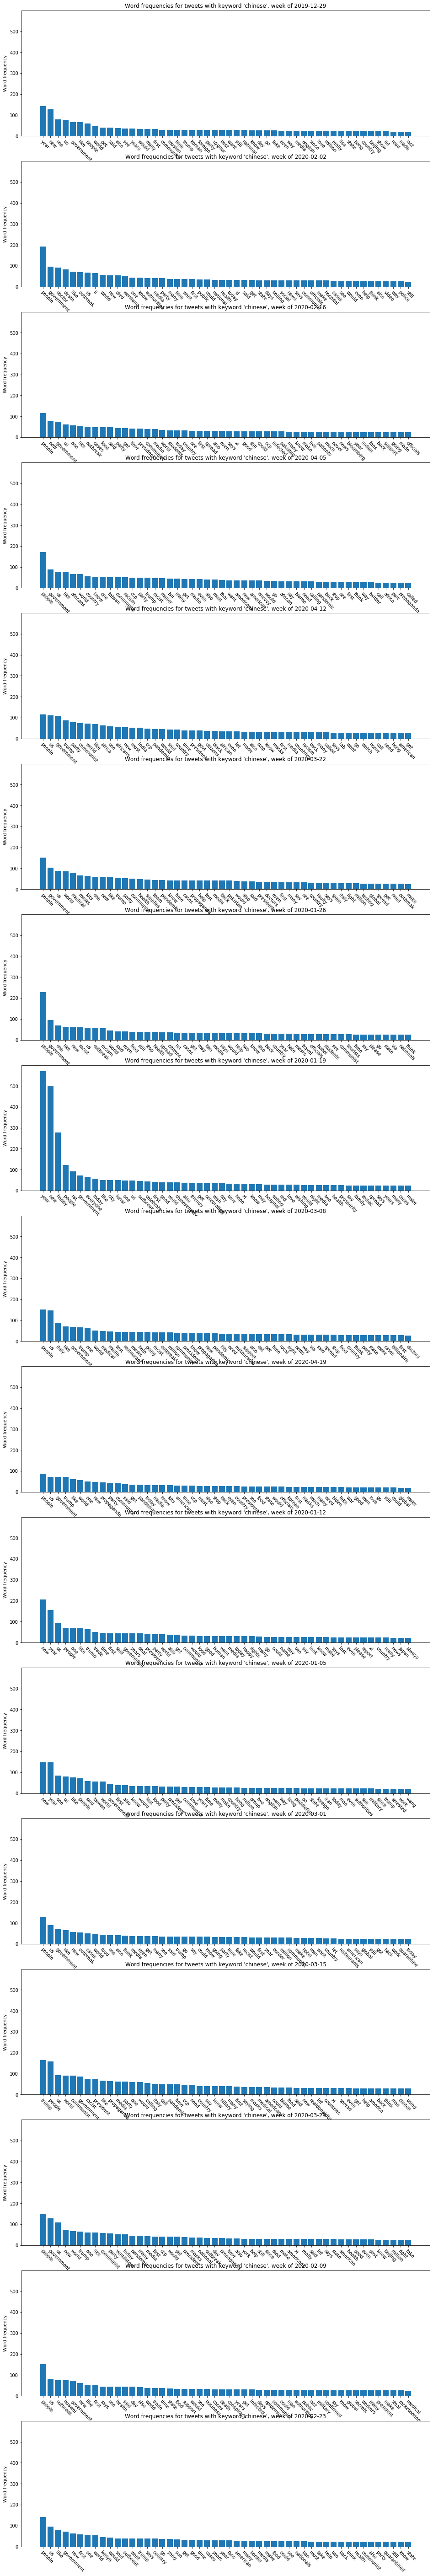

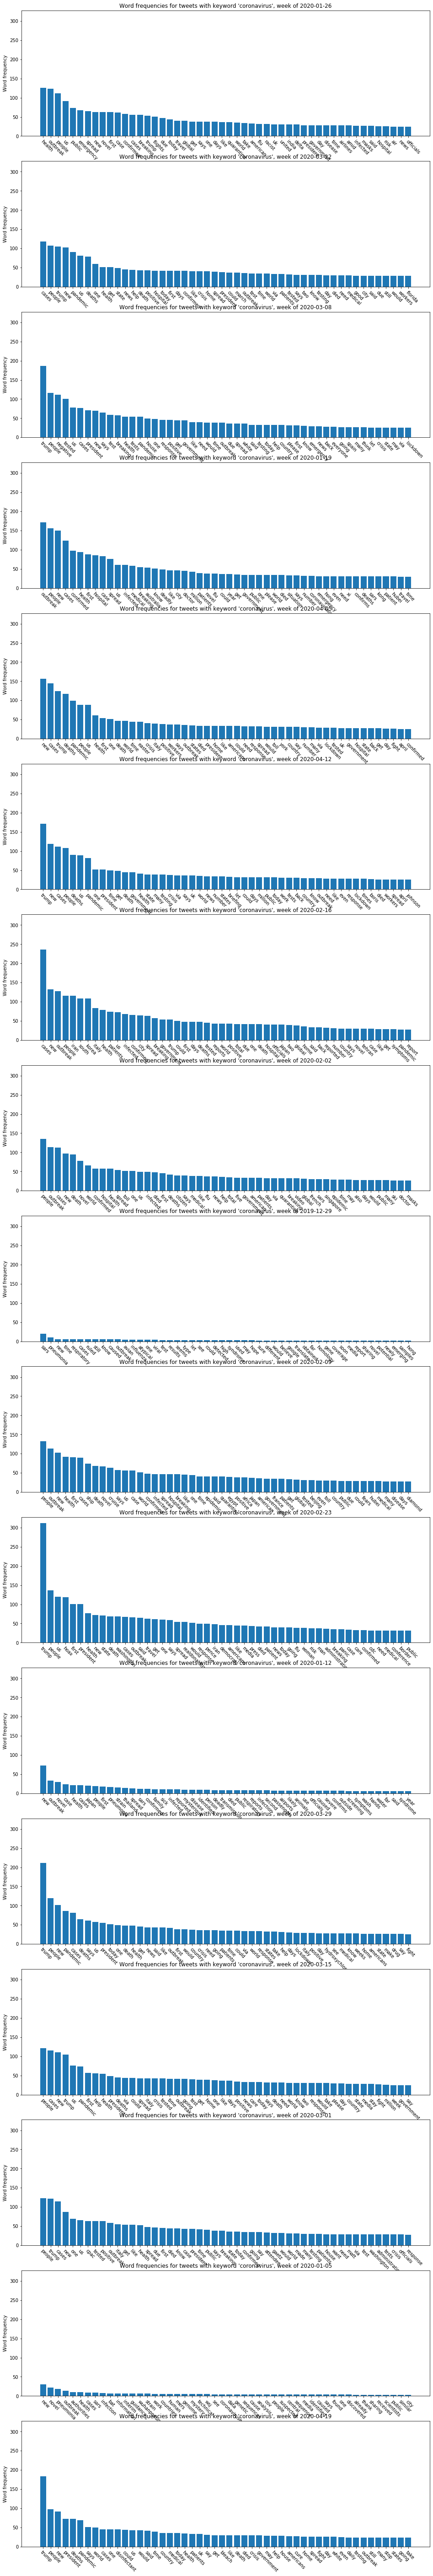

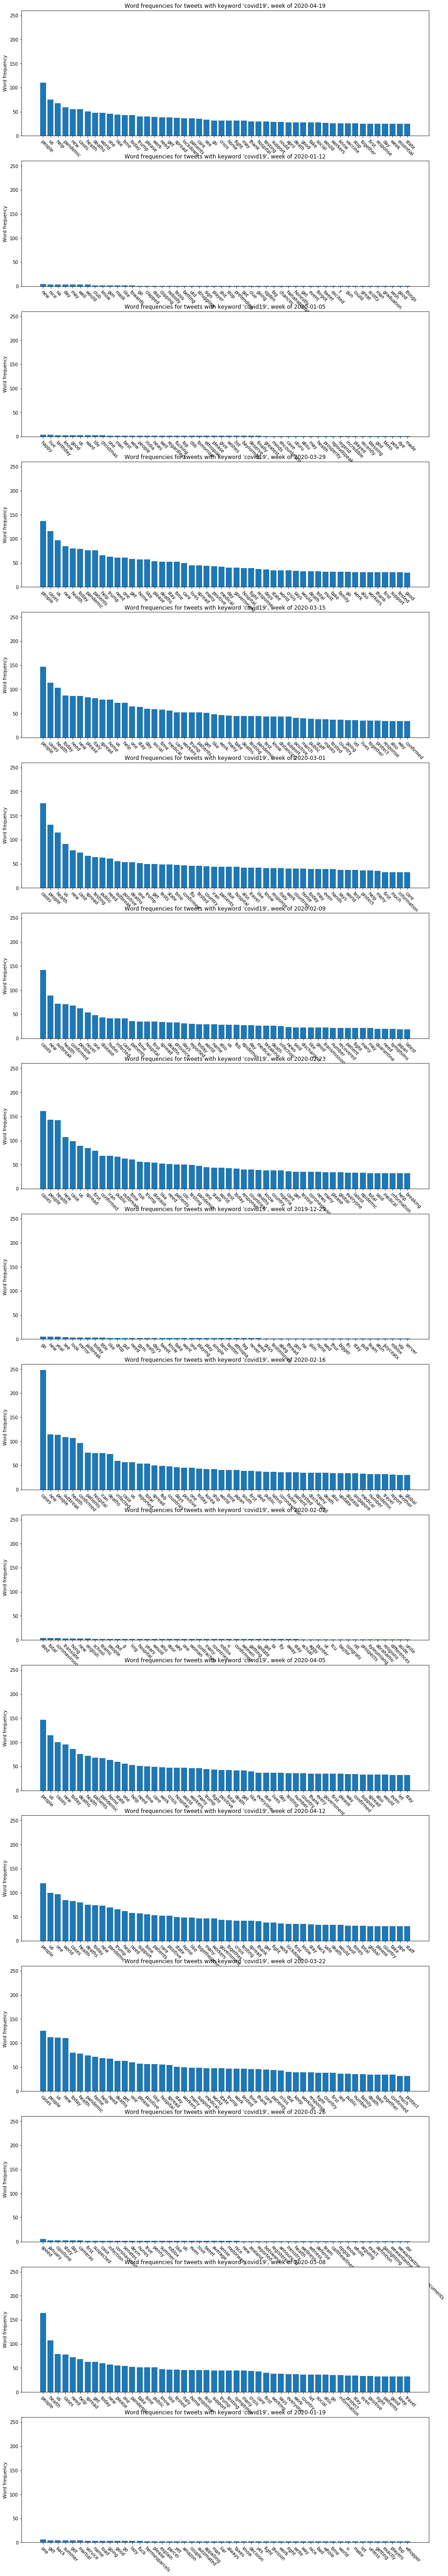

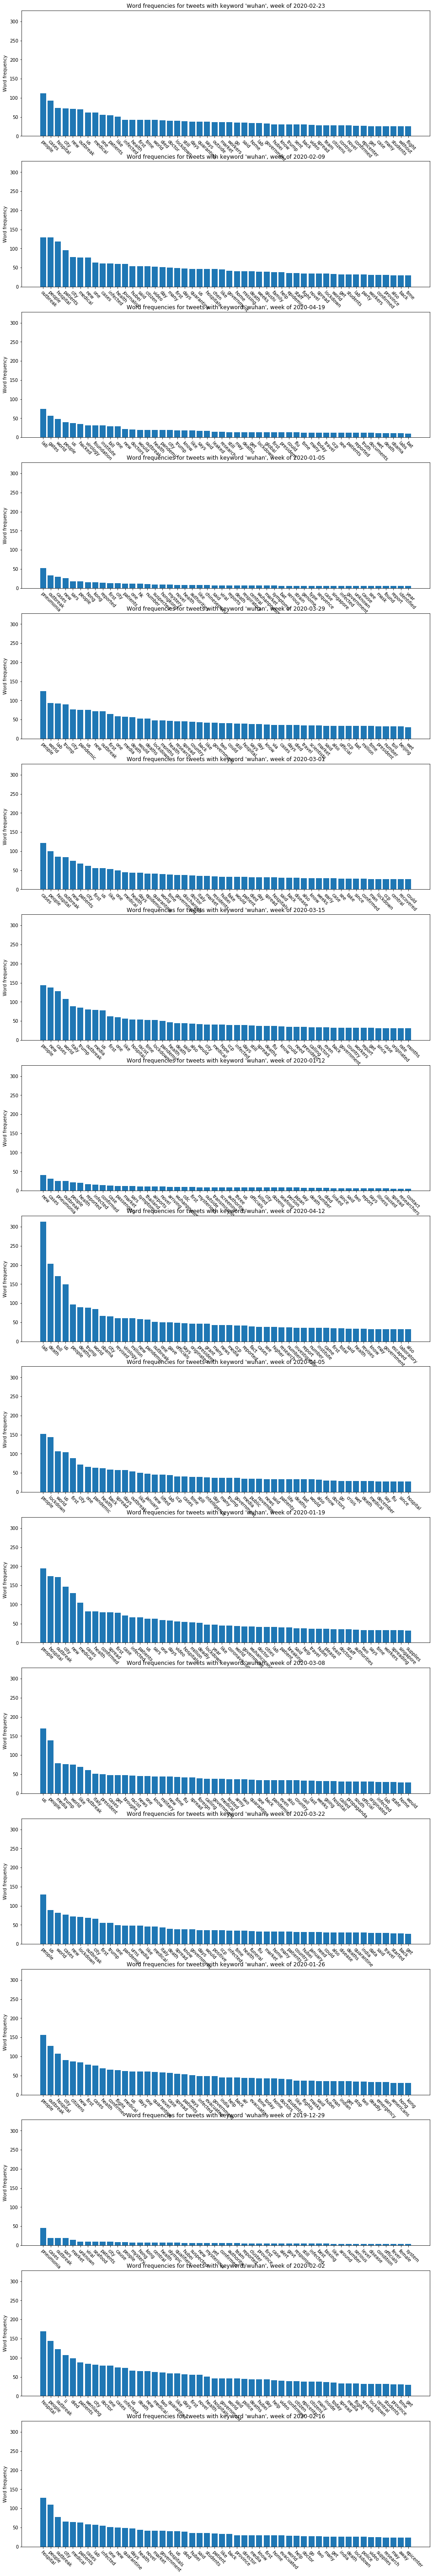

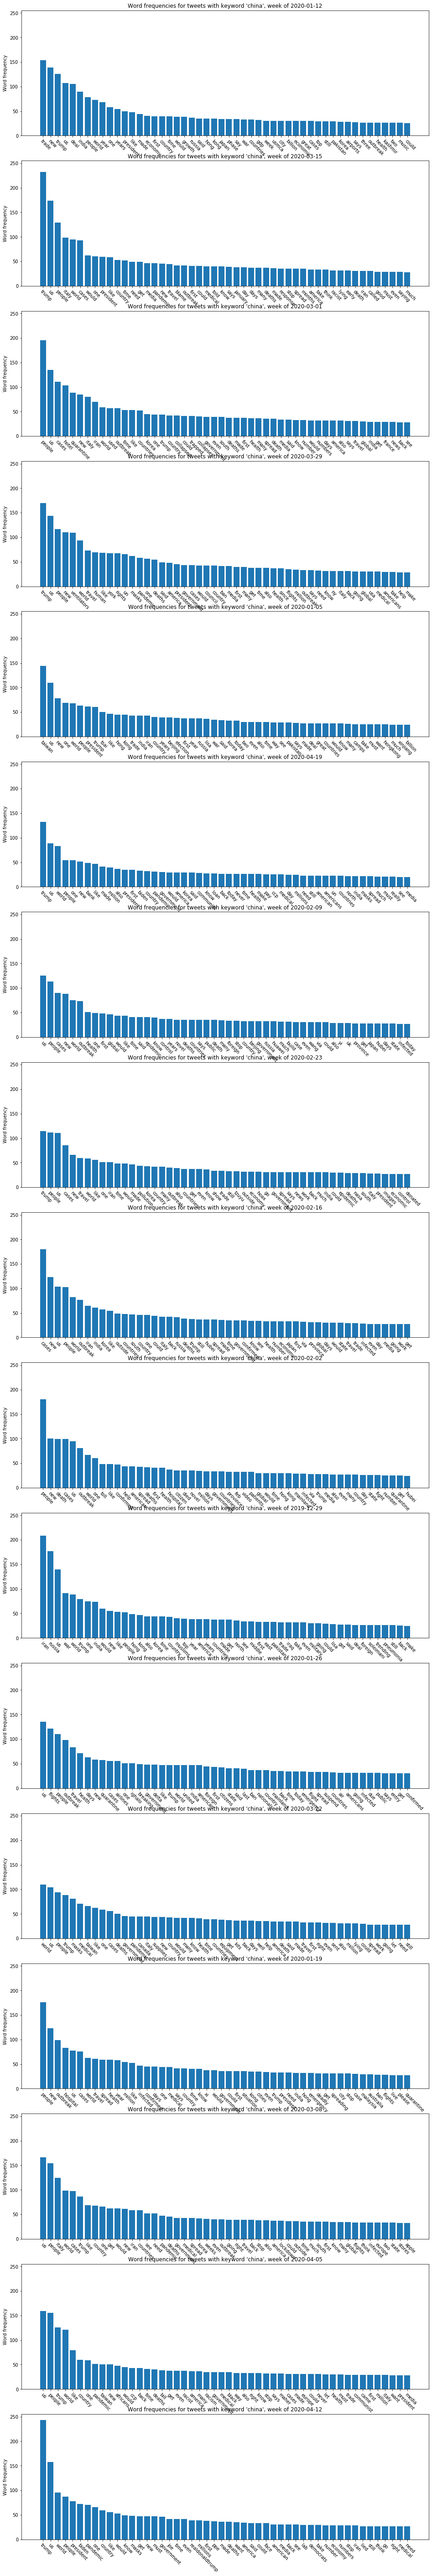

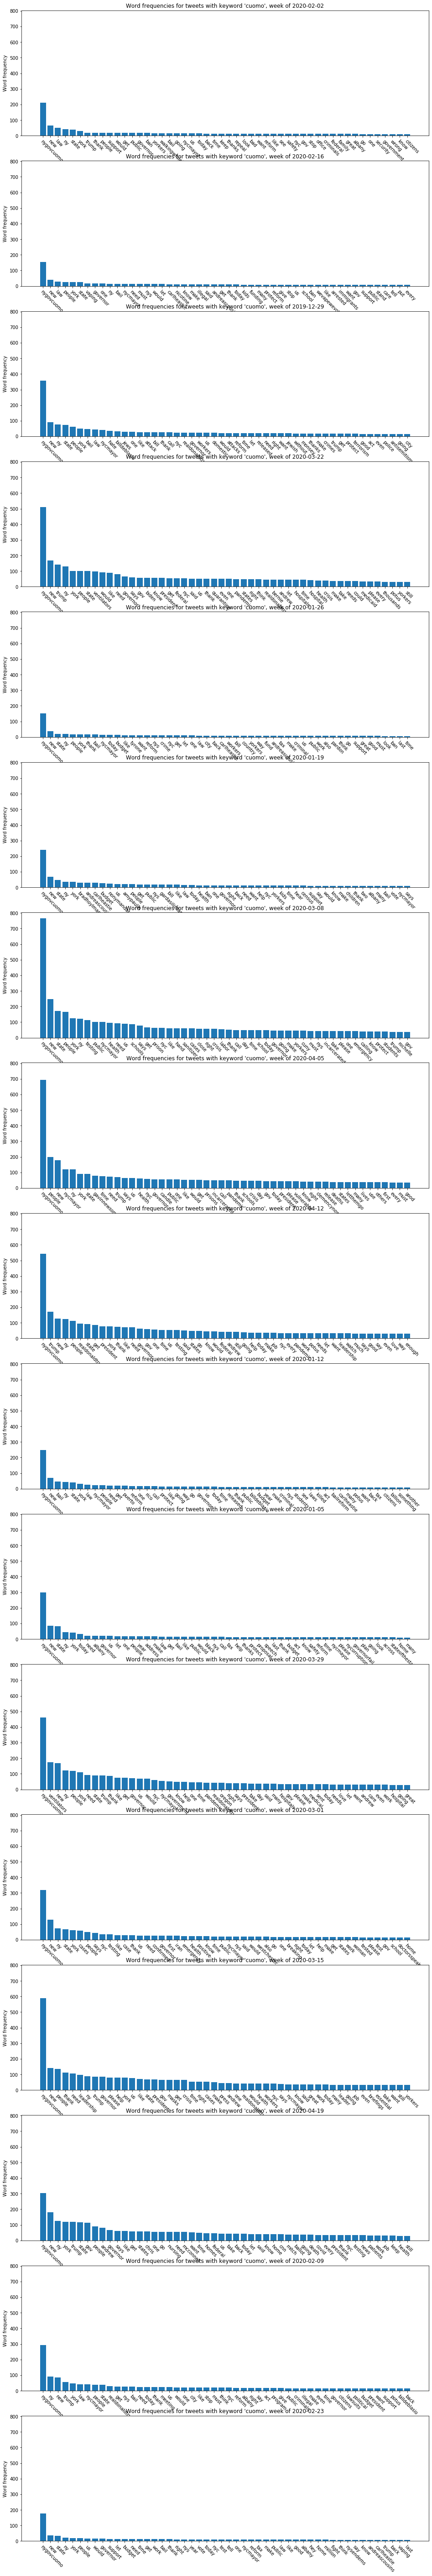

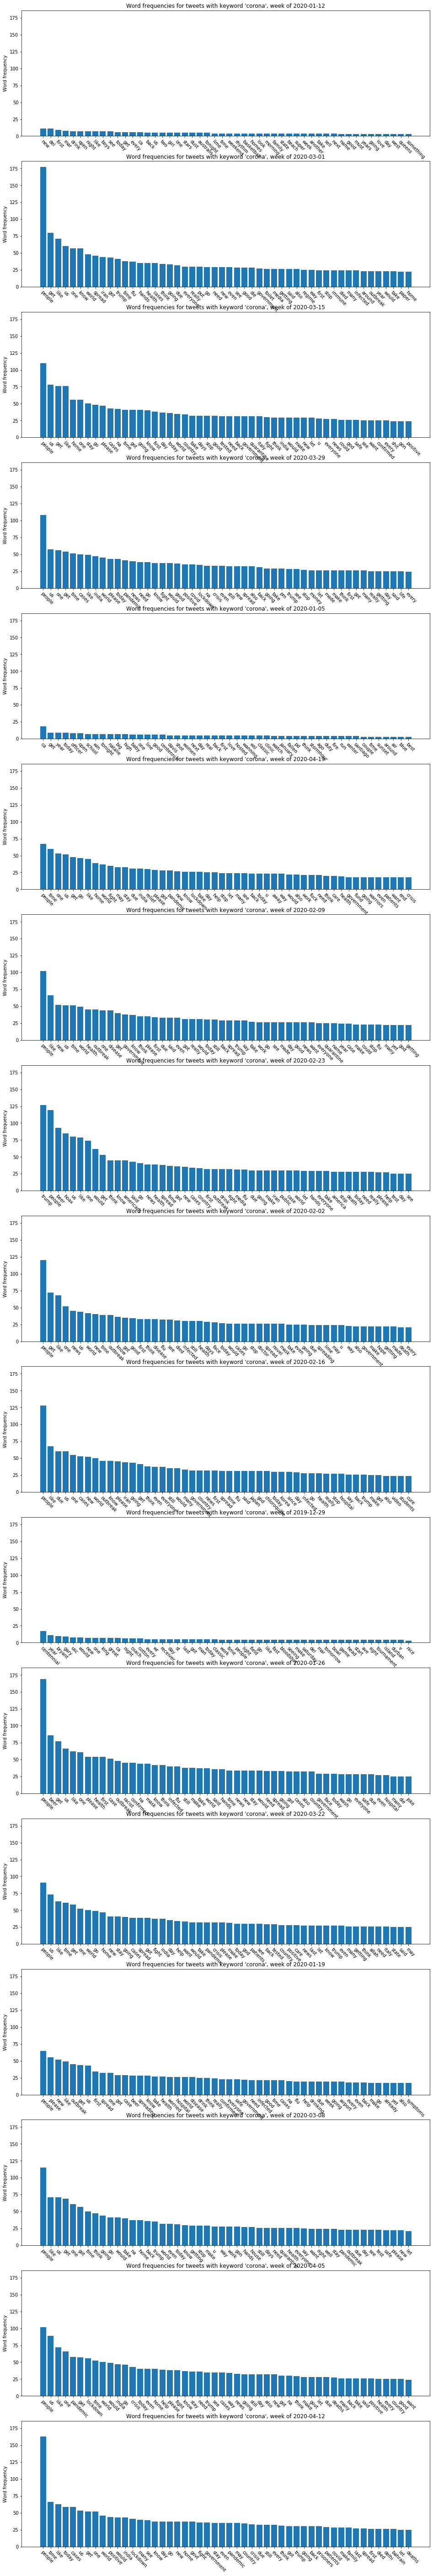

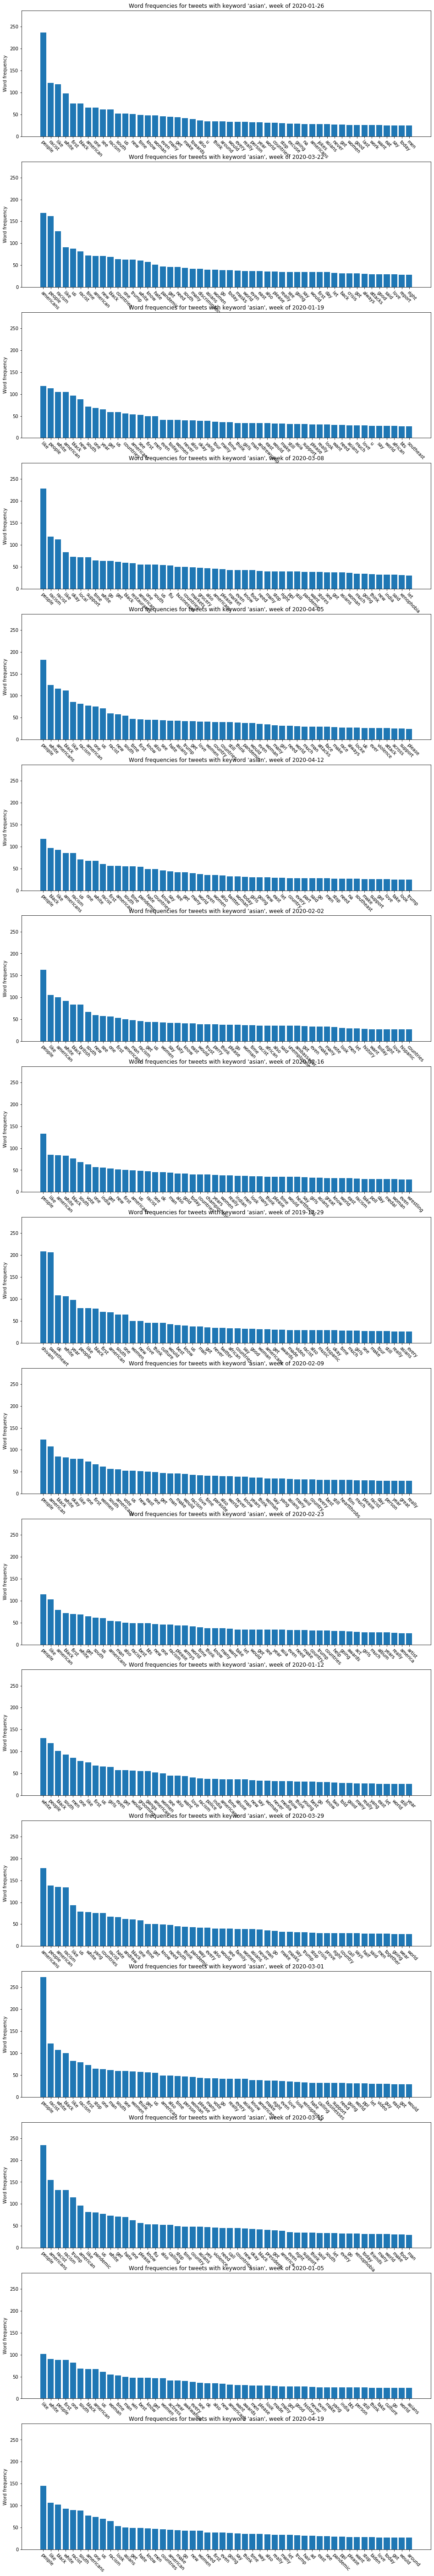

In [100]:
for keyword in keywords:
    keyCounters = weeklyCounters[keyword]
    fig, subs = plt.subplots(len(keyCounters), sharey=True, figsize=(16, len(keyCounters)* 6))
    i = 0
    for date, counter in keyCounters.items():
        counter = Counter(counter)
        words, count = zip(*counter.most_common(50))
        subs[i].bar(words, count)
        subs[i].set_ylabel("Word frequency")
        subs[i].set_title(f"Word frequencies for tweets with keyword '{keyword}', week of {date}")
        plt.setp(subs[i].xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
        i += 1
    plt.savefig(f"graphs/{keyword}_freq")
        


In [104]:
wc = WordCloud(max_words=1000, width=2400, height=1600)
wc.generate_from_frequencies(totalCounter)
wc.to_file("graphs/total_wordcloud.png")